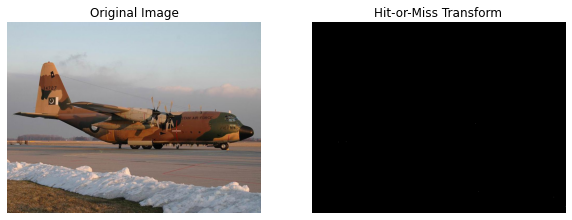

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to binary image using Otsu's thresholding
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Define structuring elements for hit and miss
structuring_element_hit = np.array([[0, 1, 0],
                                    [1, 1, 1],
                                    [0, 1, 0]], dtype=np.uint8)

structuring_element_miss = np.array([[1, 0, 1],
                                     [0, 0, 0],
                                     [1, 0, 1]], dtype=np.uint8)

# Apply Hit-or-Miss Transform
# Note: OpenCV's morphologyEx function does not directly support Hit-or-Miss. 
# So, we perform the operation by combining erosion and bitwise_not operations.
hit_or_miss = cv2.morphologyEx(binary_image, cv2.MORPH_HITMISS, structuring_element_hit)
miss = cv2.morphologyEx(cv2.bitwise_not(binary_image), cv2.MORPH_ERODE, structuring_element_miss)
result = cv2.bitwise_and(hit_or_miss, miss)

# Visualize the original and modified images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Modified image (after Hit-or-Miss Transform)
plt.subplot(1, 2, 2)
plt.imshow(result, cmap='gray')
plt.title('Hit-or-Miss Transform')
plt.axis('off')

plt.show()


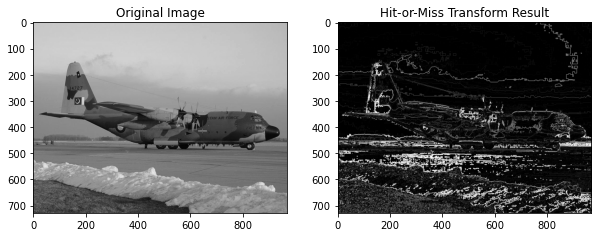

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_structuring_element(shape):
    if shape == 'cross':
        return np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)
    else:  
        # Allow for defining more complex structuring elements here
        raise ValueError("Invalid structuring element shape")

def hit_or_miss_transform(image, hit_se, miss_se):
    hit_erosion = cv2.erode(image, hit_se, iterations=1)
    miss_erosion = cv2.erode(255 - image, miss_se, iterations=1)
    return cv2.bitwise_and(hit_erosion, miss_erosion)

# Load Image (Grayscale)
image = cv2.imread('c130.jpg', cv2.IMREAD_GRAYSCALE)

# Define Structuring Elements (Let's keep a 'cross' as an example)
hit_se = create_structuring_element('cross')
miss_se = np.array([[0, 1, 0],
                    [1, 0, 1],
                    [0, 1, 0]], dtype=np.uint8)

# Apply Hit-or-Miss Transform
transformed_image = hit_or_miss_transform(image, hit_se, miss_se)

# Visualize Results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Hit-or-Miss Transform Result')

plt.show() 
